In [128]:
# Install the requirements, pandas needs to be at least 0.19.2 for URL crawl.
import warnings
warnings.filterwarnings('ignore')
%pip install -q pandas
%pip install -q seaborn
%pip install -q scikit-learn



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [129]:
# data handeling libaries.
import numpy as np
import pandas as pd

# graphical libaries.
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('classic')
%matplotlib inline

# machine learning library.
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (ConfusionMatrixDisplay, classification_report,
                             confusion_matrix)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

sns.set()

In [115]:
# download the dataset.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
df = pd.read_csv(url, sep=" ")

# set the column names.
df.columns = ["chk_acct", "duration", "credit_his", "purpose", 
"amount", "saving_acct", "present_emp", "installment_rate", "sex", "other_debtor", 
"present_resid", "property", "age", "other_install", "housing", "n_credits", 
"job", "n_people", "telephone", "foreign", "response"]

# Change response type from 1=default risk and 2=no-default risk to 1=default risk and 0=no-default risk
df["response"] = df["response"]-1

In [130]:
# show the first 5 examples.
df.head()

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,1,29,2,4,770,0,2,1,1,0,...,0,3,2,1,0,2,0,0,0,1
1,3,8,4,7,390,0,3,1,2,0,...,0,30,2,1,0,1,1,0,0,0
2,0,26,2,3,848,0,3,1,2,2,...,1,26,2,2,0,2,1,0,0,0
3,0,17,3,0,734,0,2,2,2,0,...,3,34,2,2,1,2,1,0,0,1
4,3,23,2,7,869,4,2,1,2,0,...,3,16,2,2,0,1,1,1,0,0


In [131]:
# encode the variables with non numeric labels to numeric labels.
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [132]:
df.head()

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,1,29,2,4,770,0,2,1,1,0,...,0,3,2,1,0,2,0,0,0,1
1,3,8,4,7,390,0,3,1,2,0,...,0,30,2,1,0,1,1,0,0,0
2,0,26,2,3,848,0,3,1,2,2,...,1,26,2,2,0,2,1,0,0,0
3,0,17,3,0,734,0,2,2,2,0,...,3,34,2,2,1,2,1,0,0,1
4,3,23,2,7,869,4,2,1,2,0,...,3,16,2,2,0,1,1,1,0,0


In [133]:
df.describe()

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.578579,13.729730,2.543544,3.276276,448.246246,1.102102,2.382382,1.971972,1.681682,0.145145,...,1.359359,16.489489,1.674675,0.928929,0.406406,1.903904,0.155155,0.403403,0.037037,0.300300
std,1.257276,7.517316,1.082682,2.740578,264.582560,1.578153,1.207828,1.118802,0.708363,0.477923,...,1.049854,11.256067,0.705879,0.531525,0.577639,0.653934,0.362234,0.490826,0.188947,0.458618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,2.000000,1.000000,219.500000,0.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,8.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.000000,2.000000,3.000000,440.000000,0.000000,2.000000,2.000000,2.000000,0.000000,...,1.000000,14.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,17.000000,4.000000,4.000000,676.500000,2.000000,4.000000,3.000000,2.000000,0.000000,...,2.000000,23.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000
max,3.000000,32.000000,4.000000,9.000000,920.000000,4.000000,4.000000,3.000000,3.000000,2.000000,...,3.000000,52.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


              amount  property   duration   housing
response                                           
0         432.625179  1.261803  12.670959  0.935622
1         484.643333  1.586667  16.196667  0.913333


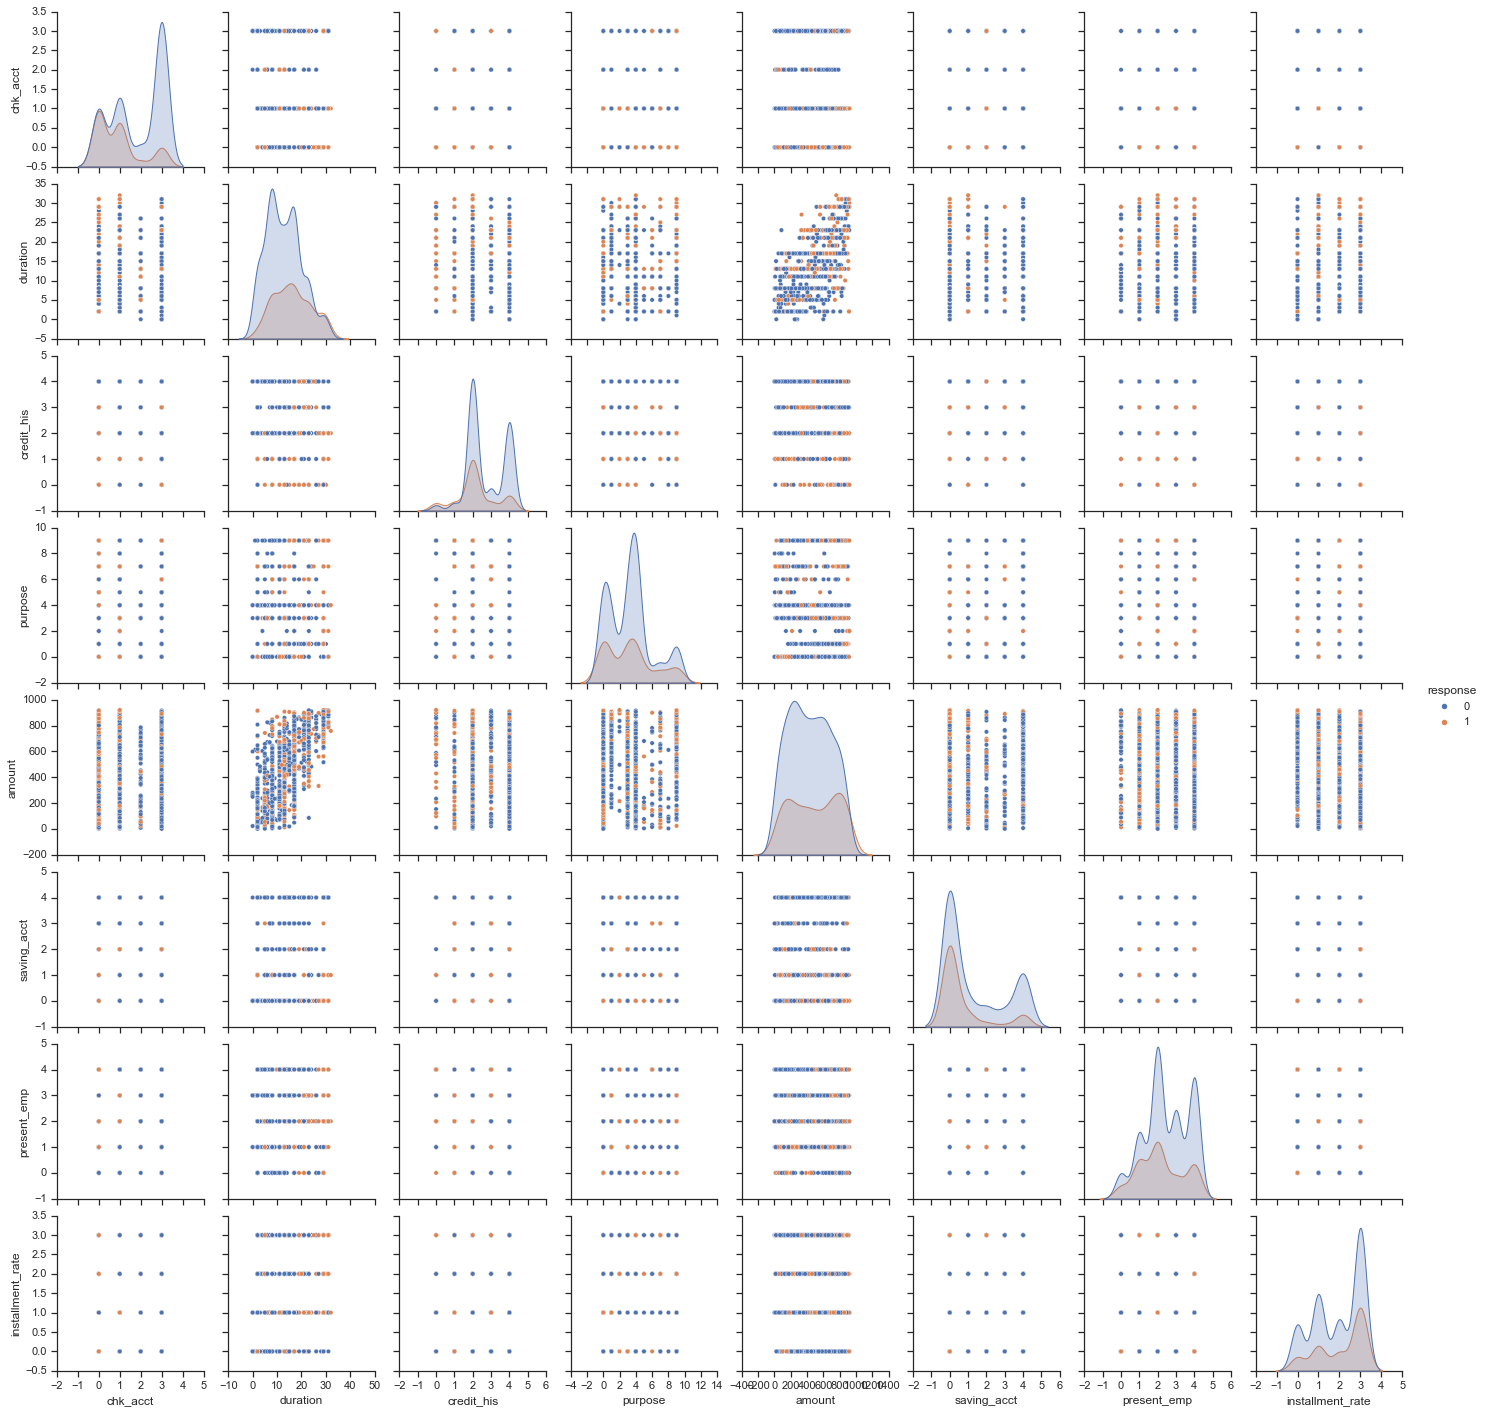

In [134]:
# making a plot grouped by the class to show the seperability of the classes via their features.
groupedData = df.groupby("response")
meanValues  = groupedData[['amount', 'property', 'duration', 'housing']].mean()
print(meanValues.to_string())

sns.set(style="ticks")
sns.pairplot(df[["chk_acct",	"duration",  "credit_his",	"purpose",	"amount",	"saving_acct",	"present_emp",	"installment_rate", "response"]], hue="response")
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

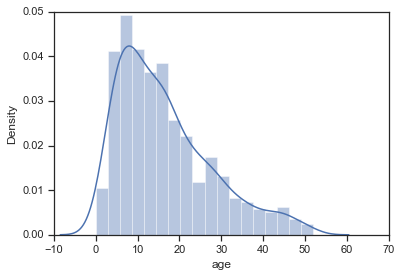

In [135]:
# plot the ages.
sns.distplot(df['age'])
plt.show()

<AxesSubplot:xlabel='chk_acct', ylabel='Count'>

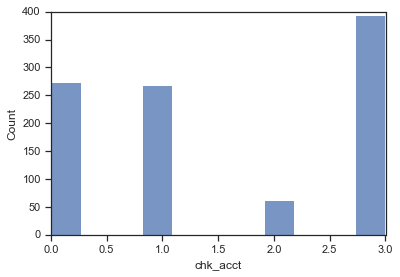

In [136]:
# plot the chk_acct variable
sns.histplot(df['chk_acct'])

In [138]:
# create train test split.
y = df['response']
X = df.drop(['response'], axis=1)

# split the dataset in to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# min max scaling.


In [124]:
# test the model with the test data and print metrics + confusion matrix.
def test_model(clf, x_test, y_test):
    # forward pass through the models.
    proba = clf.predict(X_test)
    cm = confusion_matrix(y_test.T.tolist(), proba)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot()
    plt.grid(False)
    print(f"\033[1m Classification Report")
    print(classification_report(y_test.T.tolist(), proba))

 Classification Report
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       199
           1       0.68      0.43      0.52       101

    accuracy                           0.74       300
   macro avg       0.72      0.66      0.67       300
weighted avg       0.73      0.74      0.72       300



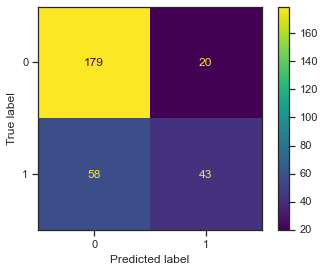

In [125]:
# Logistisc Regression
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)


test_model(clf, X_test,  y_test)



In [ ]:
# TODO: only with chk_acct and age.


 Classification Report
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       199
           1       1.00      0.07      0.13       101

    accuracy                           0.69       300
   macro avg       0.84      0.53      0.47       300
weighted avg       0.79      0.69      0.58       300



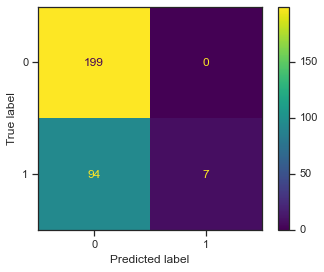

In [126]:
# Random Forest

clf = RandomForestClassifier(max_depth=3, random_state=0).fit(X_train, y_train)
test_model(clf, X_test,  y_test)

 Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       199
           1       0.51      0.47      0.48       101

    accuracy                           0.67       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.66      0.67      0.66       300



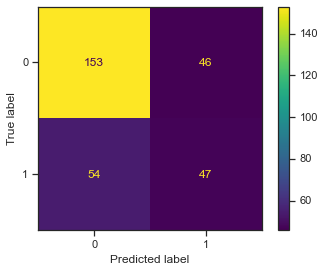

In [127]:
# Decision Tree
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

test_model(clf, X_test,  y_test)